In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
data = pd.read_csv('text.csv')

# Split data into features (X) and target (y)
X = data['text']
y = data['label']


In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize TF-IDF Vectorizer with parallel processing
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Use a subset of the training data for faster tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_tfidf, y_train, test_size=0.8, stratify=y_train, random_state=42)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 10}
Training Time: 26.18 seconds
Accuracy: 0.8565053621554185
Training Time: 26.18 seconds
Prediction Time: 0.02 seconds

Overall Precision: 0.856119053200804
Overall Recall: 0.8565053621554185
Overall F1 Score: 0.8553269954972973

Classification Report:
               precision    recall  f1-score   support

         Sad       0.90      0.90      0.90     24238
         Joy       0.84      0.91      0.88     28214
        Love       0.80      0.73      0.76      6911
       Anger       0.85      0.82      0.83     11463
        Fear       0.85      0.75      0.80      9542
    Surprise       0.78      0.72      0.75      2994

    accuracy                           0.86     83362
   macro avg       0.84      0.81      0.82     83362
weighted avg       0.86      0.86      0.86     83362



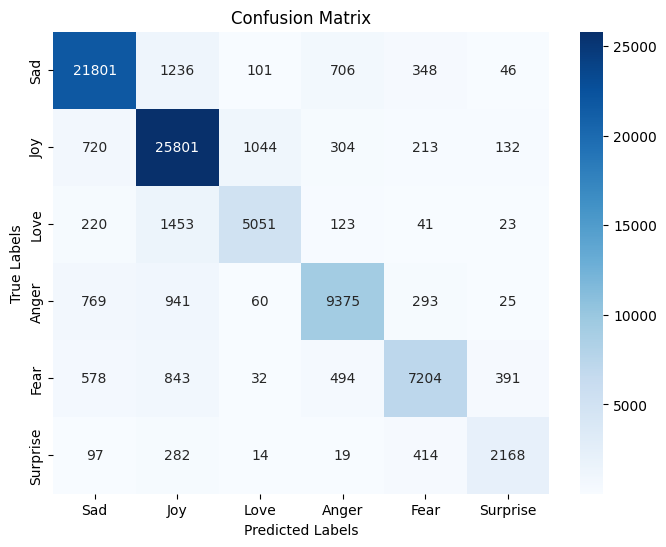

In [8]:
# Define the parameter grid for LinearSVC with a few values of C
param_grid = {'C': [0.1, 1, 10]}

# Initialize LinearSVC
linear_svc = LinearSVC()

# Use RandomizedSearchCV with fewer cross-validation folds (cv=3)
random_search = RandomizedSearchCV(linear_svc, param_grid, n_iter=3, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Measure training time
start_time = time.time()
random_search.fit(X_train_subset, y_train_subset)
training_time = time.time() - start_time

# Get the best model
best_params = random_search.best_params_
best_svc = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Training Time: {:.2f} seconds".format(training_time))

# Measure prediction time
start_time = time.time()
y_pred = best_svc.predict(X_test_tfidf)
prediction_time = time.time() - start_time

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training Time: {:.2f} seconds".format(training_time))
print("Prediction Time: {:.2f} seconds".format(prediction_time))

# Calculate and print overall precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nOverall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1)

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Sad', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=['Sad', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], 
            yticklabels=['Sad', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
